In [1]:
import tensorflow as tf
if tf.executing_eagerly():
   tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
import json 
import random
import os
import numpy as np
import tempfile



In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train= X_train/255.0
X_test = X_test/255.0

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [9]:
X_test.shape

(10000, 28, 28, 1)

In [10]:
class_names= ['TSHIRT','TROUSER','PULLOVER','DRESS','COAT',
              'SANDAL','SKIRT','SNEAKER','BAG','BOOT']

In [11]:
len(X_train)

60000

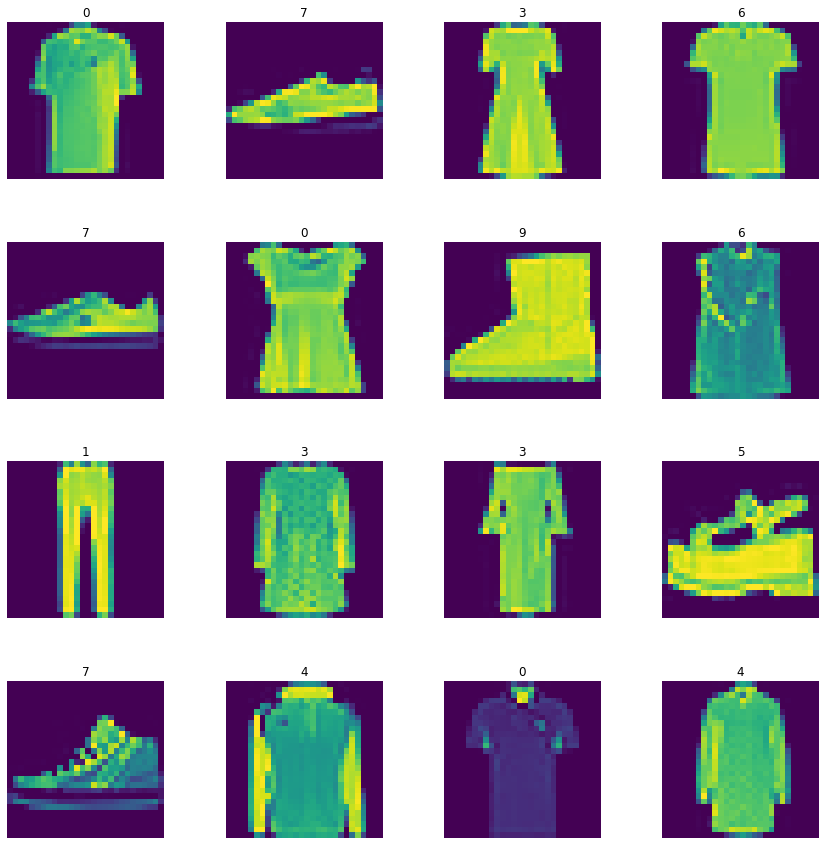

In [12]:
W_grid=4
L_grid=4

fig, axes = plt.subplots(L_grid , W_grid, figsize=(15,15))
axes=axes.ravel()

for i in np.arange(0,L_grid*W_grid):
  index= np.random.randint(0, 60000)
  axes[i].imshow(X_train[index].reshape(28,28))
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4 )
  
  



In [13]:
cnn = tf.keras.models.Sequential()



In [14]:
cnn.add(tf.keras.layers.Conv2D(32 , (3,3), activation = 'relu', input_shape =(28, 28, 1)))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))

cnn.add(tf.keras.layers.Conv2D(64 , (3,3), activation = 'relu'))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(64, activation='relu'))

cnn.add(tf.keras.layers.Dense(10, activation= 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                495680    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
__________________________________________________

In [15]:
epochs = 5
cnn.compile(optimizer= tf.optimizers.Adam(),
            loss= tf.keras.losses.sparse_categorical_crossentropy,
            metrics= ['accuracy'])

In [16]:
cnn.fit (X_train,y_train,epochs=epochs)

test_loss,test_acc = cnn.evaluate(X_test,y_test)
print('\n TEST ACCURACY :{}'.format(test_acc))

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 54s 907us/sample - loss: 0.4072 - accuracy: 0.8534
Epoch 2/5
60000/60000 [==============================] - 54s 893us/sample - loss: 0.2648 - accuracy: 0.9034
Epoch 3/5
60000/60000 [==============================] - 54s 895us/sample - loss: 0.2181 - accuracy: 0.9189
Epoch 4/5
60000/60000 [==============================] - 54s 900us/sample - loss: 0.1835 - accuracy: 0.9315
Epoch 5/5
60000/60000 [==============================] - 54s 902us/sample - loss: 0.1524 - accuracy: 0.9433


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



 TEST ACCURACY :0.9136000275611877


In [17]:
Model_Dirrectory= tempfile.gettempdir()

In [18]:
Model_Dirrectory

'/tmp'

In [19]:
version=1

In [20]:
export_path=os.path.join(Model_Dirrectory,str(version))
print('\n export path= \n{}'.format(export_path))


 export path= 
/tmp/1


In [21]:
if os.path.isdir(export_path):
  print('\n Already saved a model,cleaning up \n')
  !rm -r {export_path}

tf.compat.v1.saved_model.simple_save(
    tf.compat.v1.keras.backend.get_session(),
    export_path,
    inputs={'input image': cnn.input},
    outputs={'i name' : i for i in cnn.outputs}
)

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/1/saved_model.pb


In [43]:
Model_Dirrectory

'/tmp'

In [22]:
!ls -l {export_path}

total 96
-rw-r--r-- 1 root root 91206 Jul  7 02:42 saved_model.pb
drwxr-xr-x 2 root root  4096 Jul  7 02:42 variables


In [23]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input image'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: conv2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['i name'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: dense_1/Softmax:0
  Method name is: tensorflow/serving/predict


In [24]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [25]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  43279      0 --:--:-- --:--:-- --:--:-- 43279
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/

In [26]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 97 not upgraded.
Need to get 326 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.5.1 [326 MB]
Fetched 326 MB in 5s (67.5 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.5.1_all.deb ...
Unpacking tensorflow-model-server (2.5.1) ...
Setting up tensorflow-model-server (2.5.1) ...


In [37]:
os.environ["Model_Dirrectory"]= Model_Dirrectory

In [38]:
%%bash  --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${Model_Dirrectory}" >server.log 2>&1

Starting job # 2 in a separate thread.


In [39]:
!tail server.log

2021-07-07 02:53:07.506722: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2021-07-07 02:53:07.506858: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion_model version: 1}
2021-07-07 02:53:07.507607: I tensorflow_serving/model_servers/server_core.cc:486] Finished adding/updating models
2021-07-07 02:53:07.507682: I tensorflow_serving/model_servers/server.cc:367] Profiler service is enabled
2021-07-07 02:53:07.508226: I tensorflow_serving/model_servers/server.cc:393] Running gRPC ModelServer at 0.0.0.0:8500 ...
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 230] NET_LOG: Couldn't bind to port 8501
[evhttp_server.cc : 63] NET_LOG: Server has not been terminated. Force termination now.
[evhttp_server.cc : 265] NET_LOG: Server is not running ...
2021-07-07 02:53:07.509359: E tensorflow_serving/model_servers

In [40]:
def show(idx, title):
  plt.figure()
  plt.imshow(X_test[idx].reshape(28,28))
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

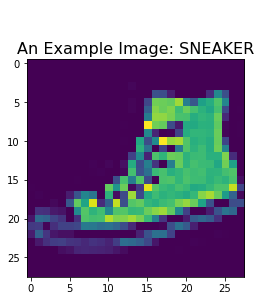

In [41]:
rando = random.randint(0,len(X_test)-1)
show(rando, 'An Example Image: {}'.format(class_names[y_test[rando]]))


In [32]:
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


In [33]:
!pip install -q requests

In [34]:
import requests

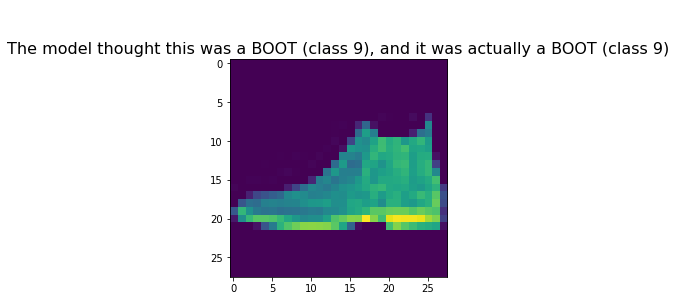

In [35]:

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])] , y_test[0], class_names[np.argmax(predictions[0])], y_test[0]))

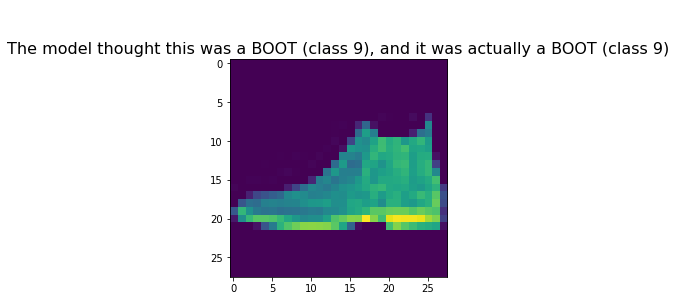

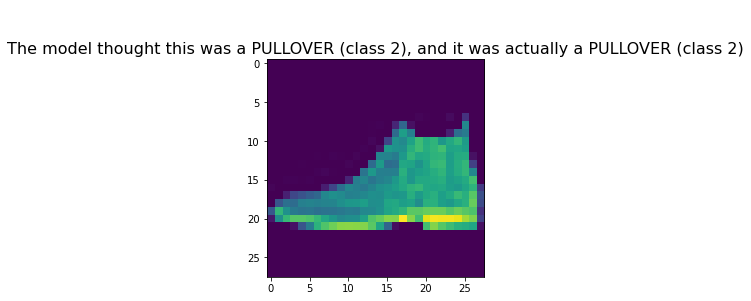

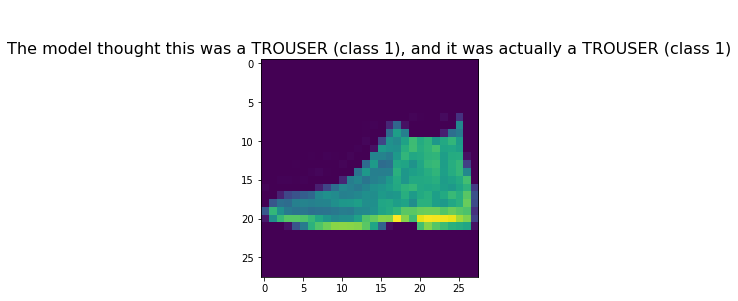

In [36]:

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

for i in range(0,3):
  show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
      class_names[np.argmax(predictions[i])] , y_test[i], class_names[np.argmax(predictions[i])], y_test[i]))